# Web Scrapping of Covid-19 Statistics and Visualizations of all continents and respective countries

## Abstract

The objective of this project was to scrape and analyze COVID-19 data from worldwide using python packages. Visualization charts are also prepared using matplotlib and pandas following with the analysis of the repective findings.

*Data under consideration is till 06/12/2020 midnight*

### Script is 100% running till 06/12/2020

In [1]:
from bs4 import BeautifulSoup 
import requests

import pandas as pd

from datetime import date 
from datetime import datetime

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')


### Scrapping Covid-19 Data from Worldometer webpage

In [2]:
headers = requests.utils.default_headers()
headers.update({ 'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'})

url = "https://www.worldometers.info/coronavirus/"
req = requests.get(url, headers)
soup = BeautifulSoup(req.content, 'html5lib')
today = date.today()


### Stating a summary for the worldwide covid-19 statistics

Overall Covid-19 cases in the world as of 2020-06-12 is 7,670,267
Overall Covid-19 deaths in the world as of 2020-06-12 is 425,916
Overall Covid-19 recovered cases in the world as of 2020-06-12 is 3,885,338


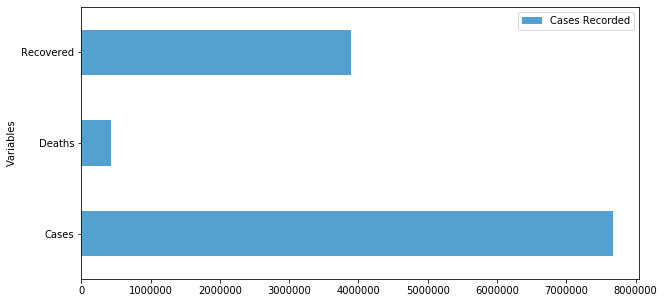

In [3]:
result = []

for i in soup.find_all('div', class_='maincounter-number'):
    try:
        overall_cases= i.find_all('span')[0].text.strip()
        result.append(overall_cases)  
    except IndexError:
        pass
df_sum = pd.DataFrame(result) 
df_sum['Variables'] = ['Cases','Deaths','Recovered']
df_sum.columns = ['Numbers','Variables']
df_sum['Numbers'] = df_sum['Numbers'].str.replace(',', '')


print ('Overall Covid-19 cases in the world as of',today,'is', result[0])
print ('Overall Covid-19 deaths in the world as of',today,'is', result[1])
print ('Overall Covid-19 recovered cases in the world as of',today,'is', result[2])


sumplot = df_sum
Stats = df_sum['Numbers'].values.tolist()
Stats = df_sum['Numbers'].astype(float)
Variables = df_sum['Variables'].values.tolist()

sumplot = pd.DataFrame({'Variables':Variables,'Cases Recorded' : Stats}) 

axx = sumplot.plot(kind='barh', x='Variables', y = 'Cases Recorded',align='center', alpha=1, figsize=(10, 5), 
                   fontsize = 10, color = '#54a1d1')

> Out of **7.8 billion** world population, approximately **0.094%** have been the victims of covid-19

- Confirmed **recovered cases** ratio wrt to **confirmed cases** is almost **1:2** at this current stage

- Confirmed death percentage records around **5.5%** of total confirmed cases, which suggests that covid-19 is not dangerously deadly 

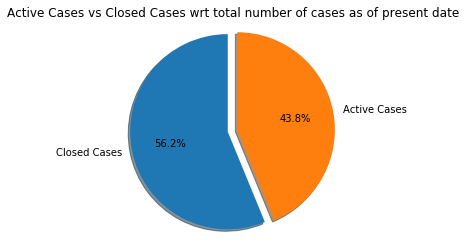

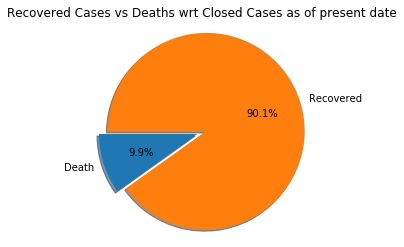

In [4]:
Stats1 = Stats[1].astype(int)
Stats2 = Stats[2].astype(int)
Stats3 = Stats[0].astype(int)

Closed_cases = Stats1 + Stats2
Active_cases = Stats3 - Closed_cases

labels1 = 'Closed Cases','Active Cases'
labels2 = 'Death', 'Recovered'
sizes1 = [Closed_cases,Active_cases]
sizes2 = [Stats1,Stats2]
explode1 = (0,0.1)
explode2 = (0.1, 0)  

fig1, pieplot1 = plt.subplots()
pieplot1.pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
pieplot1.axis('equal')
plt.title('Active Cases vs Closed Cases wrt total number of cases as of present date') #change the final date when submitting
plt.show()

fig2, pieplot2 = plt.subplots()
pieplot2.pie(sizes2, explode=explode2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=180)
pieplot2.axis('equal')  
plt.title('Recovered Cases vs Deaths wrt Closed Cases as of present date') #change the final date when submitting

plt.show()


> Calculating wrt the total number of confirmed cases 

- Out of total number of confirmed cases around **56%** have been closed(either recovered or dead), remaining are still fighting

- **90%** of the confirmed closed cases have been successfully recovered worldwide, which suggests to be a good sign

### Scrapping country wise COVID-19 statistics

In [5]:
table = soup.find('table')
table_rows = table.find_all('tr')
List = []

for tr in table_rows:
    td = tr.find_all('td')
    row = [i.text for i in td]
    List.append(row)

df = pd.DataFrame(List) 

df1 = df[8:223]
df1.columns = ['Rank', 'Country', 'Total_Cases', 'New_Cases', 'Total_Deaths', 'New_Deaths', 'Total_Recovered','a','Active_Cases','Serious', 'Tot_Cases/1M_pop', 'Deaths/1M_pop', 'Total_Tests','Tests/1M_pop','Population', 'Continent','b','c','d']
pd.set_option('display.max_rows',1000)
#Removing commas, operators and N/A values
df1['Total_Cases'] = df1['Total_Cases'].str.replace(',', '')
df1['New_Cases'] = df1['New_Cases'].str.replace(',', '')
df1['New_Cases'] = df1['New_Cases'].str.replace('+', '')
df1['Total_Deaths'] = df1['Total_Deaths'].str.replace(',', '')
df1['New_Deaths'] = df1['New_Deaths'].str.replace(',', '')
df1['New_Deaths'] = df1['New_Deaths'].str.replace('+', '')
df1['Total_Recovered'] = df1['Total_Recovered'].str.replace(',', '')
df1['Total_Recovered'] = df1['Total_Recovered'].str.replace('N/A', '')
df1['Active_Cases'] = df1['Active_Cases'].str.replace(',', '')
df1['Active_Cases'] = df1['Active_Cases'].str.replace('N/A', '')
df1['Serious'] = df1['Serious'].str.replace(',', '')
df1['Tot_Cases/1M_pop'] = df1['Tot_Cases/1M_pop'].str.replace(',', '')
df1['Total_Tests'] = df1['Total_Tests'].str.replace(',', '')
df1['Tests/1M_pop'] = df1['Tests/1M_pop'].str.replace(',', '')
df1['Population'] = df1['Population'].str.replace(',', '')
#Removing unwanted columns
del df1['a']
del df1['b']
del df1['c']
del df1['d']

print('Records Dated',today) 
df1

Records Dated 2020-06-12


,Rank,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious,Tot_Cases/1M_pop,Deaths/1M_pop,Total_Tests,Tests/1M_pop,Population,Continent
8,,World,7670267,85168,425916,2830,3885338,3359013,53946,984,54.6,,,,All
9,1,USA,2100947,11246,116386,352,819375,1165186,16700,6349,352,23354635,70579,330901704,North America
10,2,Brazil,809398,3749,41162,104,396692,371544,8318,3809,194,1364423,6421,212479860,South America
11,3,Russia,511423,8987,6715,183,269370,235338,2300,3505,46,14218674,97434,145931382,Europe
12,4,India,309389,11106,8890,389,154131,146368,8944,224,6,5363445,3889,1379270740,Asia
13,5,UK,292950,1541,41481,202,,,492,4316,611,6434713,94813,67867577,Europe
14,6,Spain,290289,502,27136,,,,617,6209,580,4465338,95507,46753887,Europe
15,7,Italy,236305,163,34223,56,173085,28997,227,3908,566,4514441,74661,60466117,Europe
16,8,Peru,214788,,6109,,102429,106250,1065,6519,185,1282478,38927,32946025,South America
17,9,Germany,186933,138,8853,2,171600,6480,462,2231,106,4694147,56036,83770376,Europe


### Scrapping continent wise COVID-19 statistics

In [6]:
df2 = df[1:7]

df2.columns = ['Rank', 'Country', 'Total_Cases', 'New_Cases', 'Total_Deaths', 'New_Deaths', 'Total_Recovered','a','Active_Cases','Serious', 'Tot_Cases/1M_pop', 'Deaths/1M_pop', 'Total_Tests','Tests/1M_pop','Population', 'Continent','b','c','d']

#Removing unwanted columns
del df2['Country']
del df2['Tot_Cases/1M_pop']
del df2['Deaths/1M_pop']
del df2['Total_Tests']
del df2['Tests/1M_pop']
del df2['Population']
del df2['Rank']
del df2['a']
del df2['b']
del df2['c']
del df2['d']
#Rearranging the columns
df2 = df2[['Continent', 'Total_Cases', 'New_Cases', 'Total_Deaths', 'New_Deaths', 'Total_Recovered', 'Active_Cases', 'Serious']]

#Removing commas and operators 
df2['Total_Cases'] = df2['Total_Cases'].str.replace(',', '')
df2['New_Cases'] = df2['New_Cases'].str.replace('+', '')
df2['New_Cases'] = df2['New_Cases'].str.replace(',', '')
df2['Total_Deaths'] = df2['Total_Deaths'].str.replace(',', '')
df2['New_Deaths'] = df2['New_Deaths'].str.replace('+', '')
df2['New_Deaths'] = df2['New_Deaths'].str.replace(',', '')
df2['Total_Recovered'] = df2['Total_Recovered'].str.replace(',', '')
df2['Active_Cases'] = df2['Active_Cases'].str.replace(',', '')
df2['Serious'] = df2['Serious'].str.replace(',', '')
df2

,Continent,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious
1,North America,2404365,17892,142379,1032,1008792,1253194,19326
2,South America,1324519,11537,56727,354,683741,584051,11987
3,Europe,2172371,15034,182025,567,1147338,843008,6732
4,Asia,1538304,38968,38730,830,934604,564970,15369
5,Africa,221086,1732,5916,47,101841,113329,526
6,Australia/Oceania,8901,5,124,,8371,406,2


### Cleaning the data frames by replacing all the null values with a 0 for better analysis

In [7]:
df1 = df1.stack().apply(pd.to_numeric, errors='ignore').fillna(0).unstack()
df2 = df2.stack().apply(pd.to_numeric, errors='ignore').fillna(0).unstack()

#### Final dataframe for all the countries

In [8]:
print('Records Dated',today) 
df1.to_csv('Covid19_Countries.csv', index=False) #Appending df1 to a csv file
df1

Records Dated 2020-06-12


,Rank,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious,Tot_Cases/1M_pop,Deaths/1M_pop,Total_Tests,Tests/1M_pop,Population,Continent
8,0,World,7670267,85168,425916,2830,3885338,3359013,53946,984,54.6,0,0,0,All
9,1,USA,2100947,11246,116386,352,819375,1165186,16700,6349,352,23354635,70579,330901704,North America
10,2,Brazil,809398,3749,41162,104,396692,371544,8318,3809,194,1364423,6421,212479860,South America
11,3,Russia,511423,8987,6715,183,269370,235338,2300,3505,46,14218674,97434,145931382,Europe
12,4,India,309389,11106,8890,389,154131,146368,8944,224,6,5363445,3889,1379270740,Asia
13,5,UK,292950,1541,41481,202,0,0,492,4316,611,6434713,94813,67867577,Europe
14,6,Spain,290289,502,27136,0,0,0,617,6209,580,4465338,95507,46753887,Europe
15,7,Italy,236305,163,34223,56,173085,28997,227,3908,566,4514441,74661,60466117,Europe
16,8,Peru,214788,0,6109,0,102429,106250,1065,6519,185,1282478,38927,32946025,South America
17,9,Germany,186933,138,8853,2,171600,6480,462,2231,106,4694147,56036,83770376,Europe


#### Final dataframe wrt all the continents

In [9]:
print('Records Dated',today) 
df2.to_csv('Covid19_ Continents.csv', index=False) #Appending df2 to a csv file
df2

Records Dated 2020-06-12


,Continent,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious
1,North America,2404365,17892,142379,1032,1008792,1253194,19326
2,South America,1324519,11537,56727,354,683741,584051,11987
3,Europe,2172371,15034,182025,567,1147338,843008,6732
4,Asia,1538304,38968,38730,830,934604,564970,15369
5,Africa,221086,1732,5916,47,101841,113329,526
6,Australia/Oceania,8901,5,124,0,8371,406,2


### Visualizing and Comparing the continental statistics wrt total number of Cases, Deaths and recovered cases recorded 

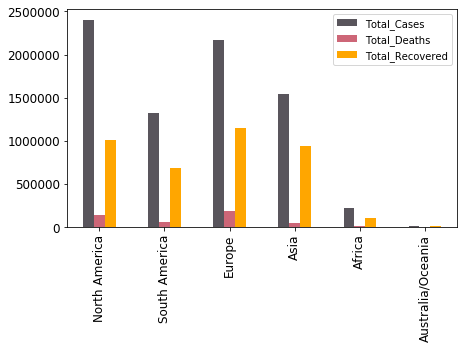

In [10]:
import matplotlib
import matplotlib.pyplot as plt 
df2plot = df2

Total_Cases = df2plot['Total_Cases'].values.tolist()
Total_Deaths = df2plot['Total_Deaths'].values.tolist()
Total_Recovered = df2plot['Total_Recovered'].values.tolist()
Continent = df2plot['Continent'].values.tolist()
State = df2plot['Continent'].values.tolist()
index = State

df2plot = pd.DataFrame({'Continent': Continent,
                        'Total_Cases': Total_Cases,
                        'Total_Deaths': Total_Deaths,
                        'Total_Recovered': Total_Recovered}, 
                       index = index) 
ax = df2plot.plot.bar(rot=90, figsize = (7,4), fontsize = 12, color = ['#59555c','#cd6677','#ffa600'])

- North America and Europe have hit hard crossing **2 million confirmed cases** till date
- Recovery rate for every continent has been almost **50%** of the total confirmed cases

- Death ratio for every continent has been varying from **1.4%** to **8.4%**
- **Europe** with the highest death percentage i.e.,**8.4%** and **North America** following at **6%**
- For the record, **Australia/Oceania** has been hit the **least** amongst all the continents with negligible figures compared to the continents having  extremely huge figures

### Visualizing and Comparing the country wise statistics wrt total number of Cases, Deaths and recovered cases recorded for top 10 affected countries

Bar chart comparing Total Tests done and Total cases reported by top 10 affected countries


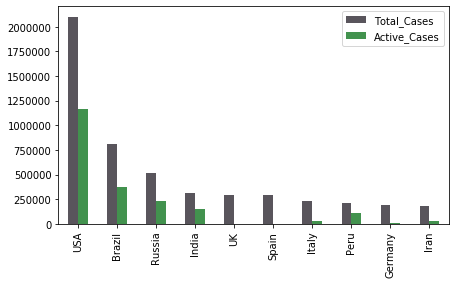

In [11]:
df1plot = df1[1:11]
Active_Cases = df1plot['Active_Cases'].values.tolist()
Serious_Cases = df1plot['Serious'].values.tolist()
Population = df1plot['Population'].values.tolist()
Total_Cases = df1plot['Total_Cases'].values.tolist()
Total_Deaths = df1plot['Total_Deaths'].values.tolist()
Total_Tests = df1plot['Total_Tests'].values.tolist()
Total_Recovered = df1plot['Total_Recovered'].values.tolist()
Country = df1plot['Country'].values.tolist()
State = df1plot['Country'].values.tolist()
index = State

print('Bar chart comparing Total Tests done and Total cases reported by top 10 affected countries')
df1plot1 = pd.DataFrame({'Country': Country,
                         'Total_Cases' : Total_Cases,
                        'Active_Cases': Active_Cases},
                         index = index) 
ax1 = df1plot1.plot.bar(rot = 90,figsize = (7,4), fontsize = 10, color = ['#59555c','#42924e'])


*Data for number of active cases for UK and Spain are N/A according to the worldometer data*
> All the countries have almost **40%-50%** active cases compared to their confirmed cases till date. Except Italy, Germany and Iran have improved their status at this current stage.

Bar chart comparing Total Cases and Total Recovered Cases reported by top 10 affected countries


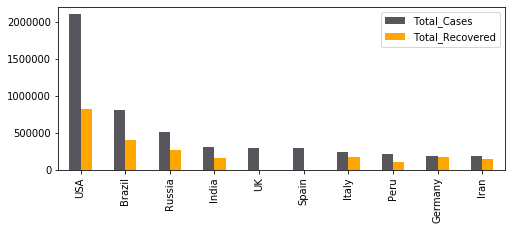

In [12]:
print('Bar chart comparing Total Cases and Total Recovered Cases reported by top 10 affected countries')
df1plot2 = pd.DataFrame({'Country': Country,
                        'Total_Cases': Total_Cases,
                        'Total_Recovered': Total_Recovered}, 
                         index = index) 
ax2 = df1plot2.plot.bar(rot = 90, figsize = (8,3), fontsize = 10, color = ['#59555c','#ffa600'])


*Data for number of recovered cases for UK and Spain are N/A according to the worldometer data*
- Specifically to pick out Italy, Germany and Iran. Number of total crecovered cases are almost equal to the number of total cases confirmed till date
- Rest every other country in the top 10 pool have close to 50% recovery ratio to the total number of confirmed cases 

### Calculating Death Percentage of the top 10 affected countries

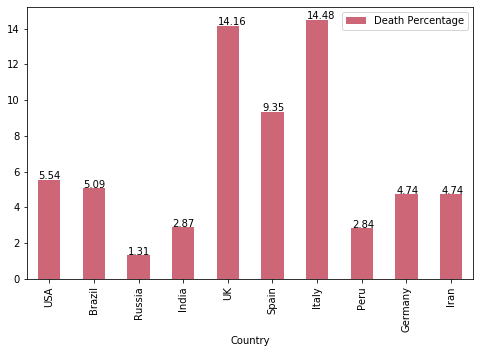

In [13]:
import math
a=[]
b = []
Death_percentage = []
for i in Total_Cases:
    a.append(i)
    
for j in Total_Deaths:
    b.append(j)

for e in range(len(a)):
    c = ((b[e]/a[e])*100)
    c = str(round(c,2))
    Death_percentage.append(c)

Country = df1['Country'].values.tolist()
Country = Country[1:11]

df3 = pd.DataFrame(Death_percentage)

df3['Country'] = Country
df3.columns = ['Death_Percentage','Country']
df3
df3plot = df3
Death_Perc = df3plot['Death_Percentage'].values.tolist()
Death_Perc = df3plot['Death_Percentage'].astype(float)
Country = df3plot['Country'].values.tolist()


df3plot = pd.DataFrame({'Country':Country,'Death Percentage' : Death_Perc}
                         ) 
ax4 = df3plot.plot(kind='bar', x='Country', y = 'Death Percentage', figsize=(8,5), fontsize = 10, color = '#cd6677')
for p in ax4.patches:
    ax4.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

> All the countries in the top 10 pool have a low death rate i.e., ranging from **1.3%** to **5.55%**. Whereas Countries like **UK and Italy** have a high death rate of around **14%-15%**

## Conclusion

Primary focus of this project was to successfully fetch the COVID-19 worldwide data and present basic analysis for the same. Hence the activities were successfully delievered.

## Citations/References

https://www.worldometers.info/coronavirus/

https://realpython.com/python-matplotlib-guide/

https://stackoverflow.com/








## License

This is a human-readable summary of (and not a substitute for) the license. Disclaimer.

You are free to:

Share — copy and redistribute the material in any medium or format Adapt — remix, transform, and build upon the material for any purpose, even commercially. The licensor cannot revoke these freedoms if you follow the license terms.

Under the following terms:

Attribution — You must give appropriate credit, provide a link to the license, and indicate if changes were made. You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use.

No additional restrictions — You may not apply legal terms or technological measures that legally restrict others from doing anything the license permits.

Notices:

You do not have to comply with the license for elements of the material in the public domain or where your use is permitted by an applicable exception or limitation.

No warranties are given. The license may not give you all the permissions necessary for your intended use. For example, other rights such as publicity, privacy, or moral rights may limit how you use the material.

# The End